### T57457 - 라공방 데이터를 활용한 매출 동향 파악


In [1]:
# Import Moudules
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
trans_full = pd.read_csv('../../resources/rawdata/거래데이터_full.csv')
lgb = trans_full[trans_full['매장코드']=='T57457']
lgb

C:\Users\dksle\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,매장코드,매장명,영업일자,영수증번호,결제일시,테이블번호,총판매금액,소분류명,상품명,상품코드,판매수량,판매단가
0,T57457,라공방,20190203,238,20190203211944,포장,14000,메뉴,꿔바러우(소),28,1,14000
1,T57457,라공방,20190203,190,20190203185755,포장,14000,메뉴,꿔바러우(소),28,1,14000
2,T57457,라공방,20190203,186,20190203184828,포장,14000,메뉴,꿔바러우(소),28,1,14000
3,T57457,라공방,20190203,184,20190203183953,포장,14000,메뉴,꿔바러우(소),28,1,14000
4,T57457,라공방,20190203,165,20190203175304,포장,14000,메뉴,꿔바러우(소),28,1,14000
...,...,...,...,...,...,...,...,...,...,...,...,...
5526074,T57457,라공방,20190226,202,20190226182746,16,6000,주류&음료,청도맥주,12,1,6000
5526075,T57457,라공방,20190227,145,20190227162427,16,2000,주류&음료,음료,16,1,2000
5526076,T57457,라공방,20190227,81,20190227135335,16,2000,주류&음료,음료,16,1,2000
5526077,T57457,라공방,20190226,234,20190226193642,16,2000,주류&음료,음료,16,1,2000


In [4]:
lgb = lgb.sort_values(by=['결제일시'],axis=0)
lgb

,매장코드,매장명,영업일자,영수증번호,결제일시,테이블번호,총판매금액,소분류명,상품명,상품코드,판매수량,판매단가
274954,T57457,라공방,20190201,1,20190201110649,5,14000,메뉴,꿔바러우(소),28,1,14000
275064,T57457,라공방,20190201,1,20190201110649,5,8400,메뉴,마라탕2단계,9,1,8400
275037,T57457,라공방,20190201,1,20190201110649,5,4000,메뉴,꼬치,1,4,1000
274995,T57457,라공방,20190201,1,20190201110649,5,3000,메뉴,소고기,17,1,3000
274971,T57457,라공방,20190201,1,20190201110649,5,2000,메뉴,면사리,18,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
5403326,T57457,라공방,20190228,292,20190228215608,9,9000,메뉴,마라탕3단계,10,1,9000
5403333,T57457,라공방,20190228,292,20190228215608,9,6000,주류&음료,음료,16,3,2000
5403262,T57457,라공방,20190228,292,20190228215608,9,11000,메뉴,꼬치,1,11,1000
5403205,T57457,라공방,20190228,292,20190228215608,9,12000,메뉴,마라샹궈2단계,20,1,12000


In [5]:
rev_by_day = lgb.groupby('영업일자').sum()['총판매금액']
rev_by_day

영업일자
20190201    6976900
20190202    6855663
20190203    5422150
20190206    6237800
20190207    6536101
20190208    6818800
20190209    6914300
20190210    7004900
20190211    6913700
20190212    6831200
20190213    6334900
20190214    7008300
20190215    7121900
20190216    7806300
20190217    7086300
20190218    5918800
20190219    6207100
20190220    6293100
20190221    6644000
20190222    6869300
20190223    7317600
20190224    6701800
20190225    6073900
20190226    5875248
20190227    6231500
20190228    6650300
Name: 총판매금액, dtype: int64

In [6]:
rev_total = lgb['총판매금액'].sum()
rev_total

172651862

In [ ]:
rev_by_day

<function matplotlib.pyplot.show(*args, **kw)>

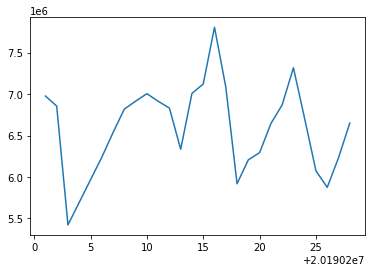

In [7]:
# 라공방 강남점 일별 매출
plt.plot(rev_by_day)
plt.show